In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_dir = './data' # directory of the cifar-10 data you downloaded
transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False, num_workers=2)
# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# to get the length of the taindata
print(len(trainset))

50000


In [4]:
# get sample of train data and see length
sample = next(iter(trainset))
print(len(sample))

2


In [5]:
# get the image and it's label
image, label = sample
print(type(image))
print(type(label))

<class 'torch.Tensor'>
<class 'int'>


In [6]:
# view image shape
image.shape
# length of test data
print(len(testset))

10000


cat


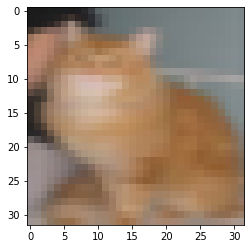

plane


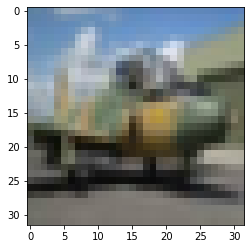

deer


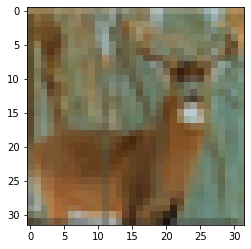

car


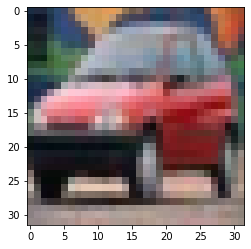

plane


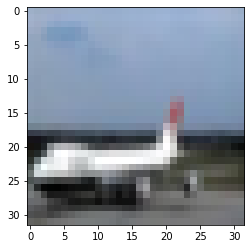

In [7]:
# train_loader images
dataiter = iter(train_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

cat


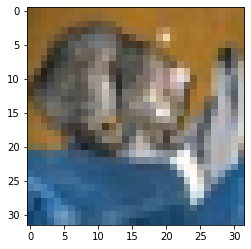

ship


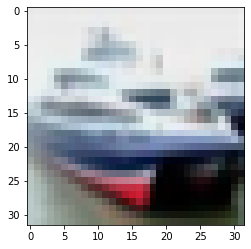

ship


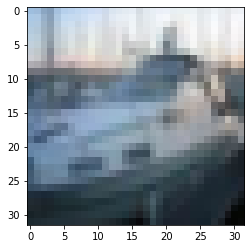

plane


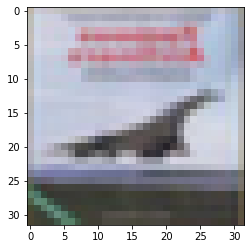

frog


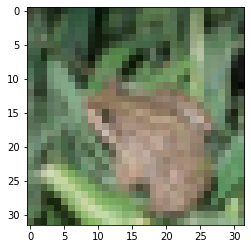

In [8]:
# test_loader images
dataiter = iter(test_loader)
batch = next(dataiter)
labels = batch[1][0:5]
images = batch[0][0:5]
for i in range(5):
    print(classes[labels[i]])
    image = images[i].numpy()
    plt.imshow(np.rot90(image.T, k=3))
    plt.show()

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.dropout1 = nn.Dropout(p=0.2, inplace=False)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #output layer
        
        return x

In [10]:
model = Net()

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
)

In [12]:
criterion = nn.CrossEntropyLoss()
# Stochastic gradient descent: to perform parameter update for each training sample
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [13]:
epoch_losses = [] # using this to record the training loss so that we can plot it against the epoch
model.train()
for epoch in range(20):
    running_loss = 0.0
    saved_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get inputs and labels and convert to appropriate device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print stats
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('%d, %5d| loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            saved_loss = running_loss
            running_loss = 0.0
    epoch_losses.append(saved_loss/10000)
print('Training done!')  # print when finished training

1,  2000| loss: 2.304
1,  4000| loss: 2.302
1,  6000| loss: 2.295
1,  8000| loss: 2.170
1, 10000| loss: 2.069
2,  2000| loss: 1.995
2,  4000| loss: 1.886
2,  6000| loss: 1.827
2,  8000| loss: 1.774
2, 10000| loss: 1.701
3,  2000| loss: 1.617
3,  4000| loss: 1.569
3,  6000| loss: 1.500
3,  8000| loss: 1.463
3, 10000| loss: 1.440
4,  2000| loss: 1.411
4,  4000| loss: 1.365
4,  6000| loss: 1.343
4,  8000| loss: 1.303
4, 10000| loss: 1.286
5,  2000| loss: 1.279
5,  4000| loss: 1.253
5,  6000| loss: 1.241
5,  8000| loss: 1.211
5, 10000| loss: 1.194
6,  2000| loss: 1.180
6,  4000| loss: 1.169
6,  6000| loss: 1.160
6,  8000| loss: 1.117
6, 10000| loss: 1.151
7,  2000| loss: 1.089
7,  4000| loss: 1.096
7,  6000| loss: 1.092
7,  8000| loss: 1.095
7, 10000| loss: 1.073
8,  2000| loss: 1.064
8,  4000| loss: 1.044
8,  6000| loss: 1.020
8,  8000| loss: 1.030
8, 10000| loss: 1.030
9,  2000| loss: 1.002
9,  4000| loss: 0.986
9,  6000| loss: 0.996
9,  8000| loss: 0.996
9, 10000| loss: 0.977
10,  2000|

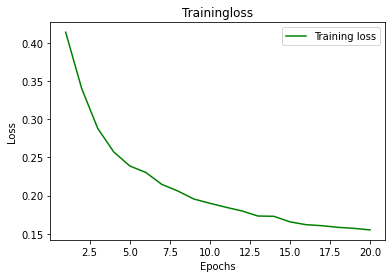

In [14]:
epochs = range(1,21)
plt.plot(epochs, epoch_losses, 'g', label='Training loss')
plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
total = 0
correct = 0
model.eval() # out our model in evaluation mode
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 74 %


In [17]:
dataiter = iter(test_loader)
images, labels = dataiter.__next__()
print('Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
outputs = model(images)
# Output prediction
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(5)))

Truth:    cat  ship  ship plane  frog
Predicted:    cat  ship   car  ship  deer


In [18]:
checkpoint = {'model': model,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')